# **Hypersensitive OCP**
(c) 2023 Devakumar Thammisetty

MPOPT is an open-source Multi-phase Optimal Control Problem (OCP) solver based on pseudo-spectral collocation with customized adaptive grid refinement techniques.

https://mpopt.readthedocs.io/

Download this notebook: [hypersensitive.ipynb](https://github.com/mpopt/mpopt/blob/docs/docs/source/notebooks/hypersensitive.ipynb)

Install mpopt from pypi using the following. Disable after first usage

Import mpopt (Contains main solver modules)

In [1]:
#!pip install mpopt
from mpopt import mp

### Defining OCP

Hypersensitive OCP:
https://www.gpops2.com/Examples/HyperSensitive.html

   \begin{aligned}
&\min_{x, u}        & \qquad & J = 0 + \dfrac{1}{2}\int_{t_0}^{t_f} (x^2 + u^2) \ dt\\
&\text{subject to} &      & \dot{x} = -x^3 + u\\
&                  &      & x_0(t_0) = 1; t_0 = 0;\\
&                  &      & x_1(t_f) = 0; t_f = 1000
  \end{aligned}


We first create an OCP object and then polulate the object with dynamics, path_constraints, terminal_constraints and objective (running_costs, terminal_costs)

In [2]:
ocp = mp.OCP(n_states=1, n_controls=1, n_phases=1)

In [3]:
ocp.dynamics[0] = lambda x, u, t: [-x[0] * x[0] * x[0] + u[0]]
ocp.running_costs[0] = lambda x, u, t: 0.5 * (x[0] * x[0] + u[0] * u[0])
ocp.terminal_constraints[0] = lambda xf, tf, x0, t0: [xf[0] - 1.0]

Initial state

In [4]:
ocp.x00[0] = 1

Box constraints

In [5]:
ocp.lbtf[0] = ocp.ubtf[0] = 1000.0

Scale the time variable

In [6]:
ocp.scale_t = 1 / 1000.0

In [7]:
ocp.validate()

### Solve and plot the results in one line

Lets solve the OCP using following pseudo-spectral approximation
* Collocation using Legendre-Gauss-Radau roots
* Let's plot the position and velocity evolution with time starting from 0.



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

Total number of variables............................:      501
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      252
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0


Number of Iterations....: 12

    

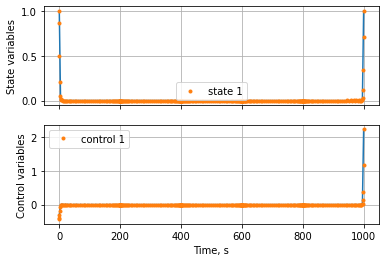

In [8]:
mpo, post = mp.solve(ocp, n_segments=5, poly_orders=50, scheme="LGR", plot=True)

*Retrive the solution*

x: states, u: Controls, t:time, a:Algebraic variables

In [9]:
x, u, t, a = post.get_data()
print(f"Terminal time, state : {t[-1][0]:.4f} vs 1000 (Exact), {x[-1]}")

Terminal time, state : 1000.0000 vs 1000 (Exact), [1.]


### Solve again with Chebyshev-Gauss-Lobatto (CGL) roots

Total number of variables............................:      501
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      252
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0


Number of Iterations....: 12

                                   (scaled)                 (unscaled)
Objective...............:   1.1406025536022588e+00    1.1406025536022588e+00
Dual infeasibility......:   5.5128124287762148e-13    5.5128124287762148e-13
Constraint violation....:   5.6878507039202523e-12    1.8587797967484221e-11
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP e

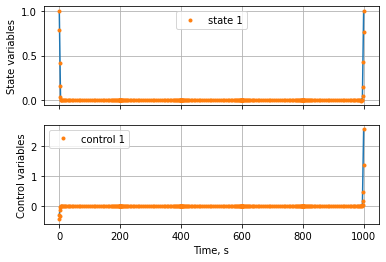

In [10]:
mpo, post = mp.solve(ocp, n_segments=5, poly_orders=50, scheme="CGL", plot=True)

In [11]:
x, u, t, a = post.get_data()
print(f"Terminal time, state : {t[-1][0]:.4f} vs 1000s (Exact), {x[-1]}")

Terminal time, state : 1000.0000 vs 1000s (Exact), [1.]


### Solve again with Legendre-Gauss-Lobatto (LGL) roots

Total number of variables............................:      501
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:      252
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0


Number of Iterations....: 12

                                   (scaled)                 (unscaled)
Objective...............:   1.1502075893651909e+00    1.1502075893651909e+00
Dual infeasibility......:   1.0234087882698972e-13    1.0234087882698972e-13
Constraint violation....:   4.7414571594509346e-13    1.3997691894473974e-12
Complementarity.........:   0.0000000000000000e+00    0.0000000000000000e+00
Overall NLP e

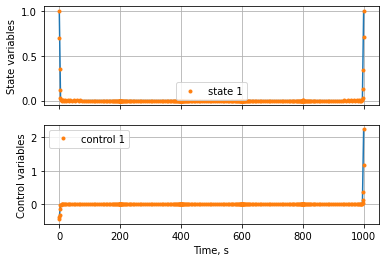

In [12]:
mpo, post = mp.solve(ocp, n_segments=5, poly_orders=50, scheme="LGL", plot=True)

In [13]:
x, u, t, a = post.get_data()
print(f"Terminal time, state : {t[-1][0]:.4f} vs 1000s (Exact), {x[-1]}")

Terminal time, state : 1000.0000 vs 1000s (Exact), [1.]
